In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display 

In [5]:
current_path = Path.cwd()
parent_path = current_path.parent
scenario_scorecard_data_path = f"{parent_path}/data_scenario_scorecards"

scenario_scorecard = pd.read_csv(f"{scenario_scorecard_data_path}/scenario_scorecards.csv")

scenario_scorecard['scenario_label'] = scenario_scorecard['Scenario'].astype(str) + "\n" + scenario_scorecard['Close'].astype(str)

display(scenario_scorecard.head())



,Scenario,Close,Equity Score,Students Changing Schools,Who Is Impacted,Geography Score,Walkability,Hazards,Transportation,School Proximity,...,ADA Compliance,Gym Cafeteria Separation,Teaching Stations,Income Score,Income Potential,Costs Score,Capital Expense,Operating Cost,Total Score,scenario_label
0,1A,Kingsley,1.1,1.0,1.2,1.0,1.0,1.0,1.0,1.0,...,5.0,1.0,1.9,2.3,2.3,2.1,1.4,2.8,1.6,1A\nKingsley
1,1B,Lincolnwood,1.3,1.5,1.0,1.4,2.3,1.0,1.0,1.1,...,1.0,1.0,1.4,5.0,5.0,3.4,2.3,4.6,2.1,1B\nLincolnwood
2,2F,"Lincolnwood, Kingsley",1.0,1.0,1.0,1.7,2.6,1.0,1.9,1.1,...,3.0,1.0,1.0,2.3,2.3,3.5,3.0,3.9,2.0,"2F\nLincolnwood, Kingsley"
3,2D,"Kingsley, Willard",1.4,1.2,1.6,2.9,3.3,2.2,3.9,2.2,...,5.0,5.0,5.0,1.0,1.0,3.3,3.5,3.0,2.8,"2D\nKingsley, Willard"
4,3D,"Lincolnwood, Kingsley, Washington",1.0,1.0,1.0,1.8,2.5,2.4,1.0,1.4,...,3.0,3.0,2.7,2.9,2.9,2.4,2.6,2.2,2.0,"3D\nLincolnwood, Kingsley, Washington"


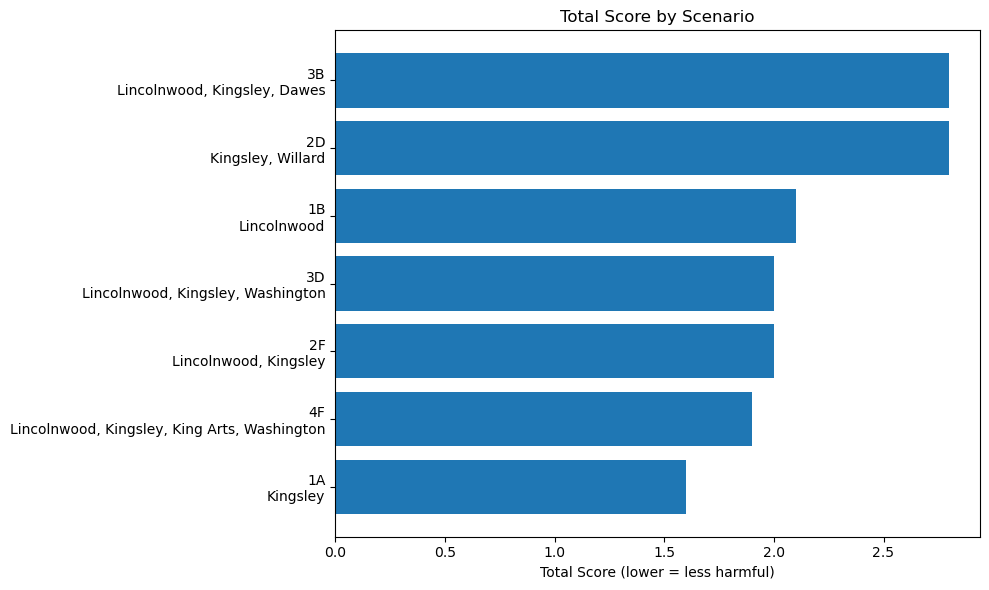

In [13]:
# sort by total score
scenario_scorecard = scenario_scorecard.sort_values(by='Total Score', ascending=True)

fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.barh(scenario_scorecard['scenario_label'], scenario_scorecard['Total Score'], color='C0')

ax.set_xlabel('Total Score (lower = less harmful)')
ax.set_title('Total Score by Scenario')
plt.tight_layout()
plt.show()

In [16]:
# plot generator
def plot_scores(df, score_column):
    # sort by total score
    df = df.sort_values(by=score_column, ascending=True)

    fig, ax = plt.subplots(figsize=(10, 6))
    bars = ax.barh(df['scenario_label'], df[score_column], color='C0')

    ax.set_xlabel(f"{score_column} (lower = less harmful)")
    ax.set_title(f"{score_column} by Scenario")
    plt.tight_layout()
    plt.show()



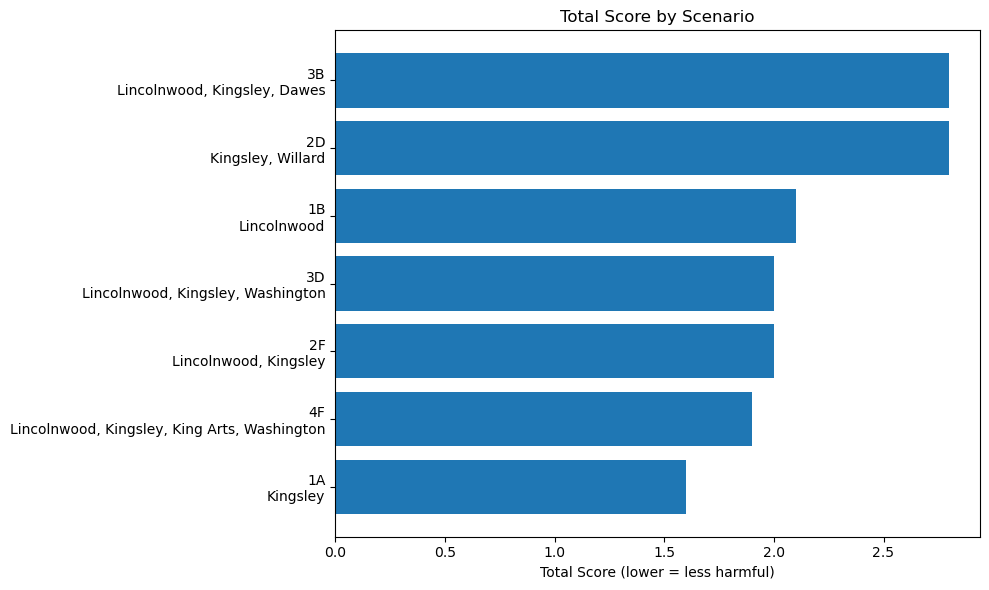

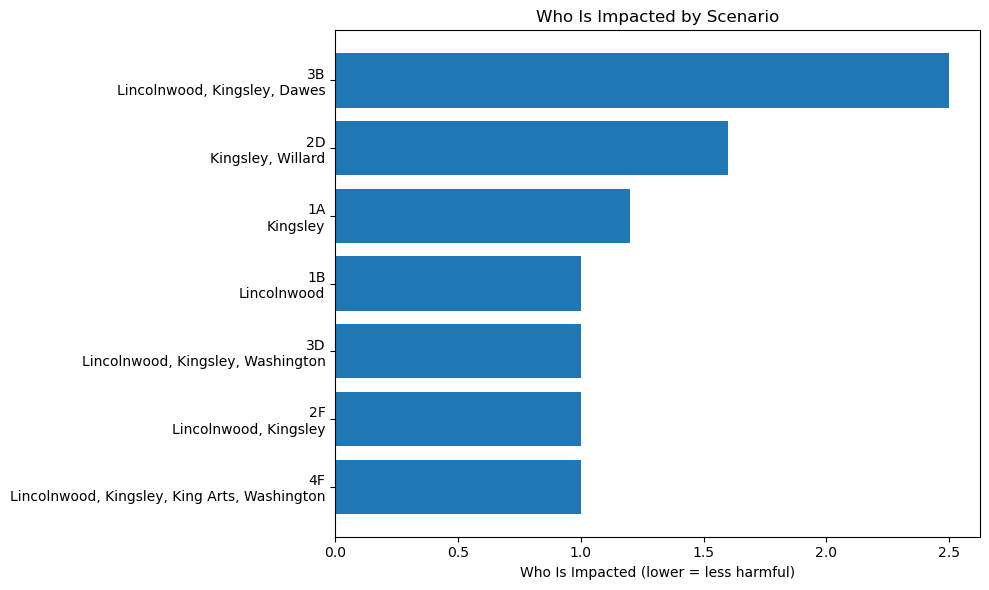

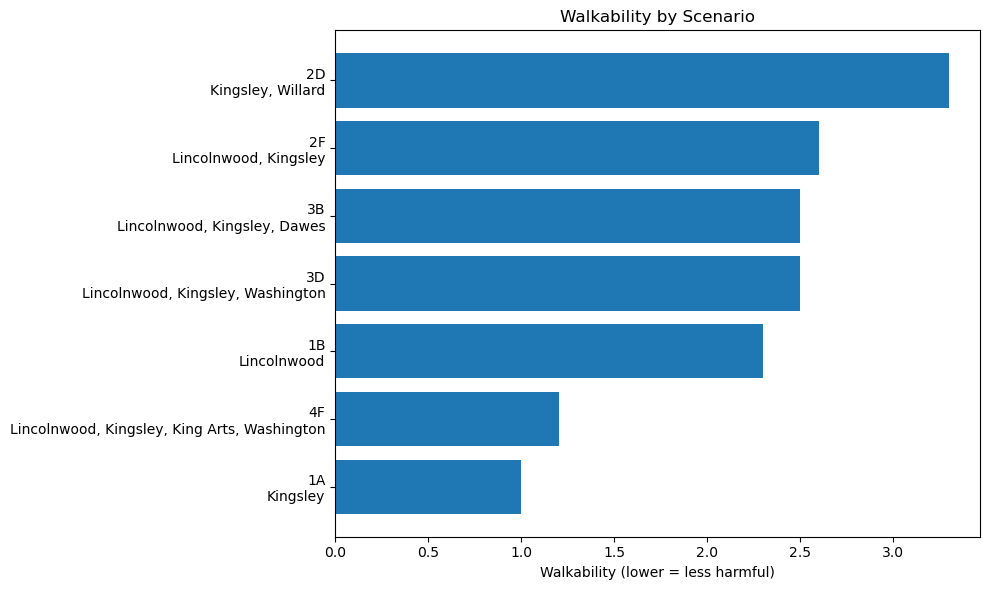

In [17]:
plot_scores(scenario_scorecard, 'Total Score')
plot_scores(scenario_scorecard, 'Who Is Impacted')
plot_scores(scenario_scorecard, 'Walkability')